In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [341]:
movies = pd.read_csv('./dataset/movies.csv')
users = pd.read_csv('./dataset/user.tsv', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

In [342]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies['genres'] = movies['genres'].apply(lambda x: np.nan if x == ['(no genres listed)'] else x)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [343]:
users.head()

,userId,movieId,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [344]:
df = pd.merge(users, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,0,50,5,881250949,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"
1,290,50,5,880473582,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"
2,79,50,4,891271545,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"
3,2,50,5,888552084,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"
4,8,50,5,879362124,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"


Exploratory Data Analysis (EDA)

display title with the highest avg rating and how many times the title has been rated

In [345]:
ratings_df = pd.DataFrame(df.groupby('title')['rating'].agg(['mean', 'count']).reset_index().rename(columns={'mean': 'rating_mean', 'count': 'rating_count'}))
ratings_df.head()

,title,rating_mean,rating_count
0,'Til There Was You (1997),2.548387,31
1,1-900 (06) (1994),3.384615,13
2,101 Dalmatians (1996),4.200000,5
3,12 Angry Men (1957),4.047619,21
4,187 (One Eight Seven) (1997),1.666667,3


histograms to show the distributions

<Axes: xlabel='rating_count', ylabel='Count'>

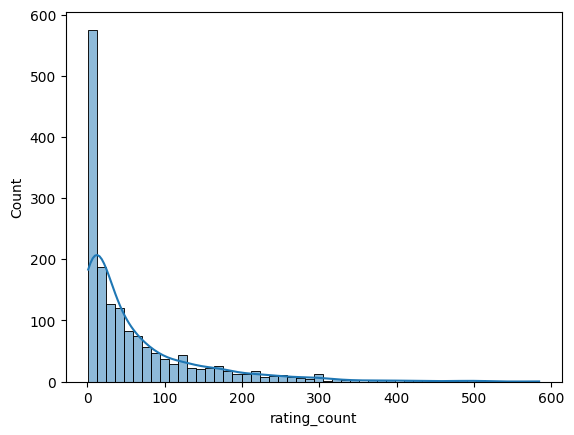

In [346]:
sns.histplot(ratings_df['rating_count'], bins=50, kde=True)

<Axes: xlabel='rating_mean', ylabel='Count'>

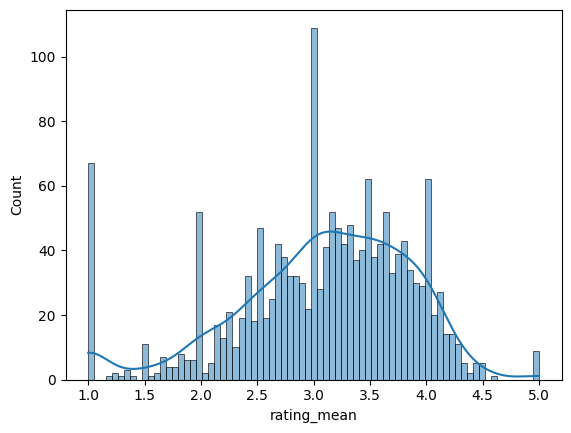

In [347]:
sns.histplot(ratings_df['rating_mean'], bins=75, kde=True)

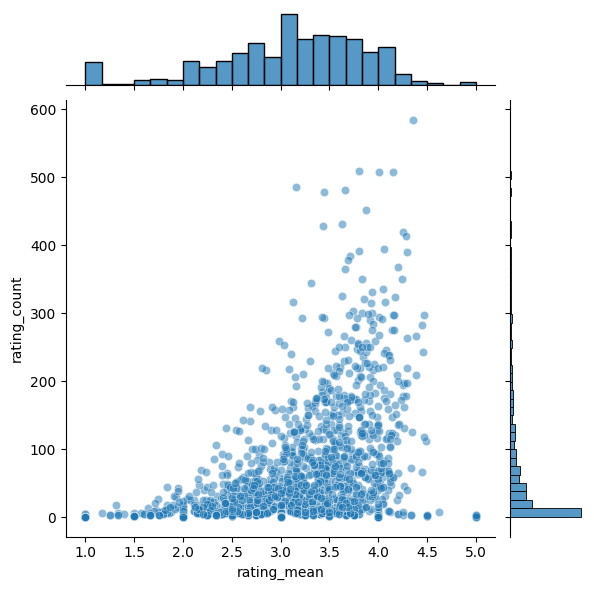

In [348]:
sns.jointplot(x='rating_mean', y='rating_count', data=ratings_df, alpha=0.5)

create a matrix between users and movie titles to see how much a user rates a movie title

In [349]:
df_matrix = df.pivot_table(index='userId', columns='title', values='rating')
df_matrix

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"301, 302 (301/302) (1995)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997)
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [350]:
ratings_df.sort_values('rating_count', ascending = False)

,title,rating_mean,rating_count
1533,"Usual Suspects, The (1995)",4.359589,584
792,"Kid in King Arthur's Court, A (1995)",3.803536,509
294,City Hall (1996),4.155512,508
951,Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
1101,"Perez Family, The (1995)",3.156701,485
...,...,...,...
893,MURDER and murder (1996),1.000000,1
714,"Ice Storm, The (1997)",3.000000,1
1145,"Promise, The (La promesse) (1996)",4.000000,1
421,Dracula (Bram Stoker's Dracula) (1992),1.000000,1


In [351]:
toy_story_viewers = df_matrix['Toy Story (1995)']
powerranger_viewers = df_matrix['Mighty Morphin Power Rangers: The Movie (1995)']


In [352]:
correlate_toy_story = df_matrix.corrwith(toy_story_viewers)
correlate_powerranger = df_matrix.corrwith(powerranger_viewers)

C:\Users\zackr\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\zackr\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\zackr\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\zackr\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [353]:
toy_story_corr_df = pd.DataFrame(correlate_toy_story, columns=['Correlation'])
toy_story_corr_df.dropna(inplace=True)
toy_story_corr_df.reset_index(inplace=True)
toy_story_corr_df.sort_values('Correlation', ascending=False)

,title,Correlation
500,Glory (1989),1.0
1125,Star Trek VI: The Undiscovered Country (1991),1.0
1031,"Saint, The (1997)",1.0
524,"Great Race, The (1965)",1.0
1066,She's So Lovely (1997),1.0
...,...,...
1233,Traveller (1997),-1.0
83,"Assignment, The (1997)",-1.0
737,Love in Bloom (1935),-1.0
1092,Snow White and the Seven Dwarfs (1937),-1.0


In [354]:
toy_story_corr_df = toy_story_corr_df.join(ratings_df['rating_count'])
toy_story_corr_df[toy_story_corr_df['rating_count'] > 100].sort_values('Correlation', ascending=False).head()

,title,Correlation,rating_count
781,McHale's Navy (1997),1.0,336
1125,Star Trek VI: The Undiscovered Country (1991),1.0,117
1066,She's So Lovely (1997),1.0,176
350,Double Happiness (1994),1.0,106
81,Ashes of Time (Dung che sai duk) (1994),1.0,261


In [355]:
powerranger_corr_df = pd.DataFrame(correlate_powerranger, columns=['Correlation'])
powerranger_corr_df.dropna(inplace=True)
powerranger_corr_df.reset_index(inplace=True)
powerranger_corr_df.sort_values('Correlation', ascending=False)

,title,Correlation
1237,"Three Caballeros, The (1945)",1.0
817,Mighty Morphin Power Rangers: The Movie (1995),1.0
1097,Shall We Dance? (Shall We Dansu?) (1996),1.0
530,"Grand Day Out with Wallace and Gromit, A (1989)",1.0
10,8 1/2 (8½) (1963),1.0
...,...,...
1005,Raising Arizona (1987),-1.0
550,Happy Gilmore (1996),-1.0
944,Peanuts - Die Bank zahlt alles (1996),-1.0
337,Demolition Man (1993),-1.0


In [356]:
powerranger_corr_df = powerranger_corr_df.join(ratings_df['rating_count'])
powerranger_corr_df[powerranger_corr_df['rating_count'] > 100].sort_values('Correlation', ascending=False).head()

,title,Correlation,rating_count
244,Children of the Revolution (1996),1.0,127
817,Mighty Morphin Power Rangers: The Movie (1995),1.0,128
1237,"Three Caballeros, The (1945)",1.0,124
1101,She's So Lovely (1997),1.0,485
535,"Great Dictator, The (1940)",1.0,119
